# Tensor Flow to create a useless images

To learn how to encode a simple image and a GIF

## Import needed for Tensorflow

In [1]:
import numpy as np
import tensorflow as tf

## Import needed for Jupiter

In [2]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import Image

## A function to save a picture

In [3]:
def write_png(tensor, name):
    casted_to_uint8 = tf.cast(tensor, tf.uint8)
    converted_to_png = tf.image.encode_png(casted_to_uint8)
    f = open(name, "wb+")
    f.write(converted_to_png.eval())
    f.close() 

## A function to draw the cost function in Jupyter

In [4]:
class CostTrace:
    """A simple example class"""
    def __init__(self):
        self.cost_array = []
    def log(self, cost):
        self.cost_array.append(cost)
    def draw(self):
        plt.figure(figsize=(12,5))
        plt.plot(range(len(self.cost_array)), self.cost_array, label='cost')
        plt.legend()
        plt.yscale('log')
        plt.show()


## Create some random pictures
### Encode the input (a number)
This example convert the number to a binary representation

In [5]:
# Init size
width = 100
height = 100
RGB = 3
shape = [height,width, RGB]

# Create the generated tensor as a variable
rand_uniform = tf.random_uniform(shape, minval=0, maxval=255, dtype=tf.float32)
generated = tf.Variable(rand_uniform)

#define the cost function
c_mean = tf.reduce_mean(tf.pow(generated,2)) # we want a low mean
c_max = tf.reduce_max(generated) # we want a low max
c_min = -tf.reduce_min(generated) # we want a high mix

c_diff = 0
for i in range(0,height-1, 1):
    line1 = tf.gather(generated, i,)
    line2 = tf.gather(generated, i+1)
    c_diff += tf.reduce_mean(tf.pow(line1-line2-30, 2)) # to force a gradient


cost = c_mean + c_max + c_min + c_diff
#cost = c_mean + c_diff
print ('cost defined')

train_op = tf.train.GradientDescentOptimizer(0.5).minimize(cost, var_list=[generated])
print ('train_op defined')

# Initializing the variables
init = tf.initialize_all_variables()
print ('variables initialiazed defined')    

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    print ('init done')
    cost_trace = CostTrace()
    for epoch in range(0,10000):
        sess.run(train_op)
        if (epoch % 100 == 0):
            c = cost.eval()
            print ('epoch', epoch,'cost' ,c, c_mean.eval(), c_min.eval(), c_max.eval(), c_diff.eval())
            cost_trace.log(c)
            write_png(generated, "generated{:06}.png".format(epoch))
print ('all done') 

cost defined
train_op defined
variables initialiazed defined
init done
('epoch', 0, 'cost', 1150368.8, 21663.955, -0.36533859, 254.74608, 1128450.4)
('epoch', 100, 'cost', 291412.19, 18368.645, -15.115782, 237.85574, 272820.81)
('epoch', 200, 'cost', 165056.8, 17544.734, -21.837952, 232.34003, 147301.56)
('epoch', 300, 'cost', 134189.97, 17152.645, -26.307716, 228.55885, 116835.08)
('epoch', 400, 'cost', 122183.33, 16887.836, -28.327135, 226.68208, 105097.13)
('epoch', 500, 'cost', 115945.95, 16679.002, -29.263021, 225.22833, 99070.977)
('epoch', 600, 'cost', 112126.48, 16501.117, -29.578547, 224.43327, 95430.516)
('epoch', 700, 'cost', 109534.09, 16342.718, -29.32696, 223.73236, 92996.969)
('epoch', 800, 'cost', 107644.77, 16197.697, -28.789602, 223.4454, 91252.414)
('epoch', 900, 'cost', 106192.88, 16062.438, -28.001347, 223.4292, 89935.016)
('epoch', 1000, 'cost', 105030.01, 15934.678, -27.431665, 223.69884, 88899.062)
('epoch', 1100, 'cost', 104067.64, 15812.794, -26.621958, 223.99

<IPython.core.display.Javascript object>


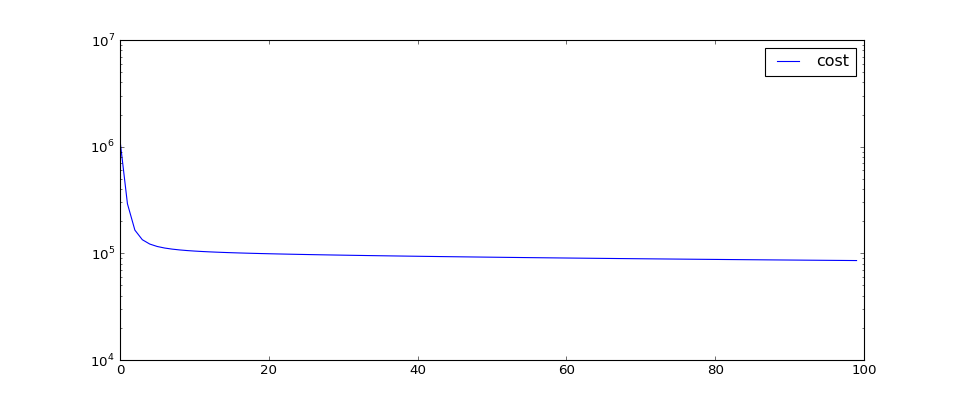

In [10]:
cost_trace.draw()

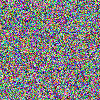

In [7]:
Image("generated000000.png")

## To create a GIF

In [8]:
from PIL import Image, ImageSequence
import glob, sys, os
os.chdir(".")
frames = []
for file in glob.glob("gene*.png"):
    print(file)
    im = Image.open(file)
    frames.append(im)

from images2gif import writeGif
writeGif("generated.gif", frames, duration=0.1)

generated000000.png
generated000100.png
generated000200.png
generated000300.png
generated000400.png
generated000500.png
generated000600.png
generated000700.png
generated000800.png
generated000900.png
generated001000.png
generated001100.png
generated001200.png
generated001300.png
generated001400.png
generated001500.png
generated001600.png
generated001700.png
generated001800.png
generated001900.png
generated002000.png
generated002100.png
generated002200.png
generated002300.png
generated002400.png
generated002500.png
generated002600.png
generated002700.png
generated002800.png
generated002900.png
generated003000.png
generated003100.png
generated003200.png
generated003300.png
generated003400.png
generated003500.png
generated003600.png
generated003700.png
generated003800.png
generated003900.png
generated004000.png
generated004100.png
generated004200.png
generated004300.png
generated004400.png
generated004500.png
generated004600.png
generated004700.png
generated004800.png
generated004900.png


images2gif.py:325: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  im2 = im[y0:y1,x0:x1]


Feedback wellcome @dh7net